# Framework Improvements

In [21]:
load("../framework/instance_gen.sage")

In [22]:
PACKAGES_FOLDER = '/home/sage/Nextcloud/Apprentissage/Telecom ParisTech/MPRI/Stages/CryptoExperts/python-packages'
import sys
if PACKAGES_FOLDER not in sys.path:
    sys.path += [PACKAGES_FOLDER]

## Dimension reduction

In [130]:
n = 70
m = n
q = 3301
D_s = build_centered_binomial_law(40)
D_e = build_centered_binomial_law(40)
d = m + n

In [131]:
A, b, dbdd = initialize_from_LWE_instance(DBDD, n, q, m, D_e, D_s, diag=False, verbosity=1)
_ = dbdd.estimate_attack()

      Build DBDD from LWE      
 n= 70 	 m= 70 	 q=3301 
       Attack Estimation      
 dim=141 	 δ=1.012362 	 β=45.40  
  


In [132]:
print(dbdd.u_original)

[ -3   8  -2   0   6   7   7   4   3  -3   5  -6  12  -6  -1  -2  -2  -1   0  -9   3   3   6   1   9  -2  -4   8   2  -3  -5   0  -8   7  -1   3   1   0   7  -1   0   4  -5  -4   5  -8  -1   5   1   3   0   2  -1   4   4   1   5   7  -2  -1   2  -5  10  -2  -4  -7   8   1  11  -1  -6   2   8   1   3   3  -1   5  -3  -6  -3   5   3   0   1   1  -3  -5   9  -1  -6  -2   4  -5   0   1   6  -2  -5  -1 -10   1   1   3   0   6   5   2  -3   6  -1   2   3  -3  -2  -2   4   2   0   8  -1   3  -1   7  -7   9   5   1  -3  -6   8   1  -3  -3  10  -2  -2   3   3  -1   1]


In [133]:
v = canonical_vec(n+m, 2)
dbdd.integrate_perfect_hint(v, dbdd.leak(v))

 integrate perfect hint   	 Worthy hint !   dim=140, δ=1.01247621, β=42.87 


True

In [57]:
V = concatenate(v, -dbdd.leak(v))
gamma, data = build_standard_substitution_matrix(V, output_data=True)
print('No error in implementation:', data['normalization_matrix'] == (gamma.T * gamma).inverse(), data['det'] == (gamma.T * gamma).det())

No error in implementation: True True


In [58]:
v = canonical_vec(n+m, 0) + canonical_vec(n+m,1)
dbdd.integrate_perfect_hint(v, dbdd.leak(v))

 integrate perfect hint    


True

In [59]:
print(f'Dimension Basis = {dbdd.D.dimensions()}')

Dimension Basis = (141, 139)


In [60]:
beta, solution = dbdd.attack()

       Running the Attack      
Running BKZ-39                                        Success ! 
  


In [129]:
zero_matrix(2,4)

[0 0 0 0]
[0 0 0 0]

In [108]:
print(solution)

[  6  -4   4  -4   4  -5   0  -4  14   3  -4   3   2   6   4  -1  -1   6   0  -7  -3  -9  -5   6  -1  -1  -3  -9  -4   2   2   8   0  -2   6   7   0   4   0  -4   3   3   2  -3  -2  -3   1   0  -2   2  -3   0   1   4  -3  -4   1   8   4  -5  -5  -2  -3   8   3  -4  -2  -1   1   1   3  -1   4 -12   4  -6   5   1  13   6   2   2   4  -7  -6   1   5   4   0  -1  -1   1  -3   5  -1  -2  -4  -2   3  -2  -5   4  -4  -3   6   3   2  -2  -4  -2   4  -5  -1  -1   3  -3   6   1  10   2   1   1  -3  -2  12   3  -3   5   1   0   1   2   4  -6  -1  -5   7   5   1  -7   1]


In [ ]:
print(dbdd.Gamma)

## Integration of the $q$-modular hints

In [153]:
load("../framework/instance_gen.sage")

In [154]:
n = 70
m = n
q = 3301
D_s = build_centered_binomial_law(40)
D_e = build_centered_binomial_law(40)
d = m + n

In [155]:
A, b, dbdd = initialize_from_LWE_instance(DBDD, n, q, m, D_e, D_s, diag=False, verbosity=1)
_ = dbdd.estimate_attack()

      Build DBDD from LWE      
 n= 70 	 m= 70 	 q=3301 
       Attack Estimation      
 dim=141 	 δ=1.012362 	 β=45.40  
  


In [156]:
print(dbdd.u_original)

[-9  3  4 -2 -2  2  2  6 -6  1 -5  3 -2 -1  7 -3  2 14  7 -1 10  2  4 -9 -6  1  2 -2 -1  9  7  0  0 -5  4 -4  2  4  5 -1 -6 -1 10  6 -1 -1  1  2 -3 -2 -2 -4  4  2  0  1 -2 -1 -1  2 -2  1  0 -7  0 -2 -7 -3 -1 -1 -9 -6  8  2  3 -8 -1 -3  1 -1 -2 -2 -7  3  6 -2  9  3 -3  4  7  2 -2 -6 -5 -2  1  9  5 -5  1  4  0 -3  7  1 -1  6 -4 -3  8  4 -5 -8  2  3  2 -3 -2  0 -2  4  3  5 -5  4 -2  3  6  1 -4  6 10 -3  4  5 -6 -4  3  4  1]


In [157]:
dbdd.volumes()

(567.1386512297237, 419.40251829755783, 357.43739208094473)

In [158]:
v = vec(identity_matrix(n+m)[2])
dbdd.integrate_q_modular_hint(v, dbdd.leak(v)-q, q, estimate=False)
_ = dbdd.estimate_attack()

 integrate q modular hint   	 Worthy hint !   dim=140, δ=1.01247621, β=42.87 
       Attack Estimation      
 dim=140 	 δ=1.012476 	 β=42.87  
  


In [127]:
dbdd.volumes()

(567.1386503634875, 416.40678602400385, 358.9352573514856)

In [119]:
print((dbdd.Gamma.T * dbdd.Gamma).det())
print((dbdd.last_V * dbdd.last_V.T).det())
log(dbdd.last_V.norm())

122
122


2.4020105223666284

In [118]:
571.7210701238242-567.1386512297237

4.58241889410050

In [114]:
print(dbdd.last_V)

[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11]


In [98]:
dbdd.volumes()

(570.897017604402, 416.40678602400385, 362.69362459240006)

In [96]:
print(dbdd.last_W)

[   0    0 3301    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [97]:
print(dbdd.Gamma)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [14]:
beta, solution = dbdd.attack()

       Running the Attack      
Running BKZ-43                                            Success ! 
  


In [307]:
Pi = matrix([[2, -5]])
D = matrix([[1,0],[9,0]])
(Pi*D*Pi.T).det(), (Pi*Pi.T).det()

(-86, 29)

In [289]:
dbdd.Gamma.T.gram_schmidt()[0].T

141 x 140 dense matrix over Rational Field (use the '.str()' method to see the entries)

In [287]:
help(dbdd.Gamma.gram_schmidt)

Help on built-in function gram_schmidt:

gram_schmidt(...) method of sage.matrix.matrix_rational_dense.Matrix_rational_dense instance
    Matrix.gram_schmidt(self, orthonormal=False)
    File: sage/matrix/matrix2.pyx (starting at line 9511)
    
            Performs Gram-Schmidt orthogonalization on the rows of the matrix,
            returning a new matrix and a matrix accomplishing the transformation.
    
            INPUT:
    
            - ``self`` - a matrix whose rows are to be orthogonalized.
            - ``orthonormal`` - default: ``False`` - if ``True`` the
              returned orthogonal vectors are unit vectors.  This keyword
              is ignored if the matrix is over ``RDF`` or ``CDF`` and the
              results are always orthonormal.
    
            OUTPUT:
    
            A pair of matrices, ``G`` and ``M`` such that if ``A``
            represents ``self``, where the parenthetical properties occur
            when ``orthonormal = True``:
    
            -

In [277]:
solution = dbdd.reduced_solution            

for instruc_type, Gamma, data in dbdd._restoration_instructions[::-1]:
    solution = solution * Gamma.T
    if instruc_type == SUBSTITUTION:
        pass
    elif instruc_type == QMODULUS_SUBSTITUTION:
        print(type(solution[0].inner_product(data['v'][0])))
        print(type(data['v']), type(data['w']))
        solution += data['w'] * round(solution[0].inner_product(data['v'][0])/data['q'])
    else:
        solution += data['w'] * data['func'](solution)

<class 'sage.rings.rational.Rational'>
<class 'sage.matrix.matrix_integer_dense.Matrix_integer_dense'> <class 'sage.matrix.matrix_integer_dense.Matrix_integer_dense'>


In [265]:
dbdd.B

140 x 140 dense matrix over Rational Field (use the '.str()' method to see the entries)

In [116]:
v = vec(identity_matrix(n+m)[3]+identity_matrix(n+m)[4])
dbdd.integrate_q_modular_hint(v, dbdd.leak(v)+q, q, w=q*v)
_ = dbdd.estimate_attack()

 integrate q modular hint  

TypeError: unsupported operand parent(s) for *: 'Full MatrixSpace of 1 by 140 dense matrices over Rational Field' and 'Full MatrixSpace of 141 by 1 dense matrices over Integer Ring'

In [5]:
coeff = 2
v = vec(identity_matrix(n+m)[coeff])
l = dbdd.u_original[0,coeff] + 100*q
dbdd.integrate_q_modular_hint(v, l, q)

 integrate q modular hint  

AttributeError: 'DBDD' object has no attribute 'gamma'

In [244]:
print(solution)

[ -3   0   2  -4   5   2   1  -1  -1  -1   1   2  -1   1   0   4   5 -10   2  -1 -10   7   9   5  -2   1   6   2   4  -3   0  -1  -6   0   4  -3  -2   3   0   0  -4  -2   1  -5   3   1   4  -3  -2  -2  12 -19   2  -4   1   1   0   2  -4   7   2  -3  -3  -2  -4   1  -3   5  -9   0   0  -1   5   1  -1   8  -2   6   5  -4   1  -6  -5  -4   0  11   0  -3   1   4   1  -4  -3   2   1  10  -5   0   2   2  -2   2   0   6   7  -3   0   0   4  -4  -6  -1   1   5   3   0   0   4   5 -10   5   4   0  -2   5  -1  -8   4   0   4  -1   1  -7  -1   1   1  -3  -3   1  -2  -1]


In [233]:
solution = solution.apply_map(lambda x: dbdd.center(x,dbdd.q))
solution.str()

'[  20   64   10   34  -86  -80 -130  -75  -24   87   42   53   31  -53   60   23  -52  -17  -78  -17   67  -46  -81  164 -161   10 -104  137  -37 -132 -146 -116    1 -173  127   76  101   30   69   42   61   12   34   47   82  -97   31  -31 -116 -232    5  -70   17   46  -50   89  -80   40  -35  -12   49 -134  -25   -8  -56 -152   38   93  -17  -14   58  -28   67   60  -76  149  -51  102  -85  -85  -58  -33 -118   18  117  104   37   46  137   35  -34  -70   68 -171 -116  -25   34  -48   34    0    9  -66   65  -14  -79 -112  -60  -80  105 -152 -100    2  -92 -135 -110  -64  -73  131   66   35  142   -4  -12  -23  -60  -64  -57   54  -61   50 -107  -91   99   12  -15   55   58   28  -15   30    2]'

In [61]:
V_ = V
_, pivot = V_.nonzero_positions()[0]
dim = dbdd.D.ncols()

V1 = V_[0,:pivot] / V_[0,pivot]
V2 = V_[0,pivot+1:] / V_[0,pivot]

if data is not None:
    norm2 = 1 + scal(V1*V1.T) + scal(V2*V2.T)
    print(5, type(norm2), type(V1.T*V1))
    normalization_matrix = zero_matrix(QQ, dim-1,dim-1)
    normalization_matrix[:pivot,:pivot] = identity_matrix(pivot) - V1.T*V1 / norm2
    print(6)
    normalization_matrix[pivot:,pivot:] = identity_matrix(dim-pivot-1) - V2.T*V2 / norm2
    print(3)
    normalization_matrix[:pivot,pivot:] = - V1.T*V2 / norm2
    normalization_matrix[pivot:,:pivot] = - V2.T*V1 / norm2

    data['det'] = norm2
    data['normalization_matrix'] = normalization_matrix

5 <class 'sage.rings.rational.Rational'> <class 'sage.matrix.matrix_rational_dense.Matrix_rational_dense'>
6
3


In [55]:
identity_matrix(pivot) - V1.T*V1 / norm2

[1 0]
[0 1]

In [57]:
identity_matrix(dim-pivot-1) - V2.T*V2 / norm2

138 x 138 dense matrix over Rational Field (use the '.str()' method to see the entries)

In [58]:
normalization_matrix

140 x 140 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [201]:
help(V.map_item)

Help on method map_item in module sage.categories.modules_with_basis:

map_item(f) method of sage.matrix.matrix_integer_dense.Matrix_integer_dense instance
    Mapping a function on items.
    
    INPUT:
    
    - ``f`` -- a function mapping pairs ``(index, coeff)`` to
      other such pairs
    
    Return a new element of ``self.parent()`` obtained by
    applying the function `f` to all items ``(index, coeff)`` of
    ``self``.
    
    EXAMPLES::
    
        sage: B = CombinatorialFreeModule(ZZ, [-1, 0, 1])
        sage: x = B.an_element(); x
        2*B[-1] + 2*B[0] + 3*B[1]
        sage: x.map_item(lambda i, c: (-i, 2*c))
        6*B[-1] + 4*B[0] + 4*B[1]
    
    ``f`` needs not be injective::
    
        sage: x.map_item(lambda i, c: (1, 2*c))
        14*B[1]
    
        sage: s = SymmetricFunctions(QQ).schur()
        sage: f = lambda m,c: (m.conjugate(), 2*c)
        sage: a = s([2,1]) + s([1,1,1])
        sage: a.map_item(f)
        2*s[2, 1] + 2*s[3]



In [226]:
V[0,:10]

[1 1 0 0 0 0 0 0 0 0]

In [227]:
V[0,:10].apply_map(lambda x: x+5)

[6 6 5 5 5 5 5 5 5 5]

## Forced dimension reduction

In [1]:
load("../framework/instance_gen.sage")

In [2]:
n = 70
m = n
q = 3301
D_s = build_centered_binomial_law(40)
D_e = build_centered_binomial_law(40)
d = m + n

In [3]:
A, b, dbdd = initialize_from_LWE_instance(DBDD, n, q, m, D_e, D_s, diag=False, verbosity=1)
_ = dbdd.estimate_attack()

      Build DBDD from LWE      
 n= 70 	 m= 70 	 q=3301 
       Attack Estimation      
 dim=141 	 δ=1.012362 	 β=45.40  
  


In [4]:
dbdd.B

141 x 141 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [16]:
I = identity_matrix(5)

In [17]:
I[2,2]=0

In [26]:
min([i for i in range(I.nrows()) if not I[i].is_zero()])

0

In [14]:
I.nrows()

5

## Measure the gain of time without LLL

In [91]:
load("../framework/instance_gen.sage")

In [92]:
load('time_verifications.sage')

 Number of threads : 1 
 Number of Samples : 5 
      Validation tests      

 
 Perfect
hints,	 real,	 pred_full, 	 pred_light,
LLL... (False)141
Done.
LLL... (True)Go... [None]
[141->140]
140
Done.


Process Process-85:
Traceback (most recent call last):
  File "/opt/sagemath-9.0/local/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/sagemath-9.0/local/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sage/Nextcloud/Apprentissage/Telecom ParisTech/MPRI/Stages/CryptoExperts/python-packages/leaky_lwe_estimator/Sec5.2_validation/map_drop.py", line 17, in ff
    r = f(i + 2**16 * trial, args)
  File "<string>", line 59, in one_experiment
  File "<string>", line 37, in decorated
  File "<string>", line 125, in decorated
  File "<string>", line 96, in integrate_perfect_hint
  File "<string>", line 102, in lattice_orthogonal_section
  File "<string>", line 55, in project_and_eliminate_dep
  File "<string>", line 20, in projection_matrix
  File "sage/matrix/matrix_rational_dense.pyx", line 730, in sage.matrix.matrix_rational_dense.Matrix_rational_dense.inverse (build/cythonize

KeyboardInterrupt: 

In [116]:
help(dbdd.B.gram_schmidt)

In [119]:
M, G = dbdd.B.gram_schmidt()

In [4]:
B = dbdd.B

In [5]:
def extend_into_basis(elt, B):
    dim = B.nrows()
    linear_combinaison = zero_matrix(RR, 1, 1+dim)
    
    rest = B[dim-1]
    for i in range(B.nrows()):
        print(i)
        v = elt if i==0 else B[i-1]
        alpha = -rest.inner_product(v)/v.norm()
        rest += v*alpha
        linear_combinaison[0,i] = alpha
    
    print(rest)
    return rest, linear_combinaison

In [6]:
rest, combi = extend_into_basis(identity_matrix(141)[1], dbdd.B)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93


KeyboardInterrupt: 

In [125]:
dbdd.B

139 x 139 dense matrix over Rational Field (use the '.str()' method to see the entries)

In [7]:
help(dbdd.B.gram_schmidt)

Help on built-in function gram_schmidt:

gram_schmidt(...) method of sage.matrix.matrix_integer_dense.Matrix_integer_dense instance
    Matrix.gram_schmidt(self, orthonormal=False)
    File: sage/matrix/matrix2.pyx (starting at line 9511)
    
            Performs Gram-Schmidt orthogonalization on the rows of the matrix,
            returning a new matrix and a matrix accomplishing the transformation.
    
            INPUT:
    
            - ``self`` - a matrix whose rows are to be orthogonalized.
            - ``orthonormal`` - default: ``False`` - if ``True`` the
              returned orthogonal vectors are unit vectors.  This keyword
              is ignored if the matrix is over ``RDF`` or ``CDF`` and the
              results are always orthonormal.
    
            OUTPUT:
    
            A pair of matrices, ``G`` and ``M`` such that if ``A``
            represents ``self``, where the parenthetical properties occur
            when ``orthonormal = True``:
    
            - `

In [ ]:
(G, M) = dbdd.B.gram_schmidt

In [8]:
v = identity_matrix(141)[1]

In [9]:
help(concatenate)

Help on function concatenate in module __main__:

concatenate(L1, L2=None)
    concatenate vecs



In [10]:
concatenate(v, dbdd.B)

TypeError: base_ring (=Ambient free module of rank 141 over the principal ideal domain Integer Ring) must be a ring

In [12]:
help(block_matrix)

Help on function block_matrix in module sage.matrix.special:

block_matrix(*args, **kwds)
    This function is available as block_matrix(...) and matrix.block(...).
    
    
    Return a larger matrix made by concatenating submatrices
    (rows first, then columns). For example, the matrix
    
    ::
    
        [ A B ]
        [ C D ]
    
    is made up of submatrices A, B, C, and D.
    
    INPUT:
    
    The block_matrix command takes a list of submatrices to add
    as blocks, optionally preceded by a ring and the number of block rows
    and block columns, and returns a matrix.
    
    The submatrices can be specified as a list of matrices (using
    ``nrows`` and ``ncols`` to determine their layout), or a list
    of lists of matrices, where each list forms a row.
    
    -  ``ring`` - the base ring
    
    -  ``nrows`` - the number of block rows
    
    -  ``ncols`` - the number of block cols
    
    -  ``sub_matrices`` - matrices (see below for syntax)
    
    -  ``

In [79]:
n = 1
m = n
q = 3301
D_s = build_centered_binomial_law(40)
D_e = build_centered_binomial_law(40)
d = m + n

In [80]:
A, b, dbdd = initialize_from_LWE_instance(DBDD, n, q, m, D_e, D_s, diag=False, verbosity=1)

      Build DBDD from LWE      
 n=  1 	 m=  1 	 q=3301 


In [97]:
def extend_into_basis(elt, B):
    A = block_matrix(QQ, [[matrix(elt)], [B]])
    G, M = A.gram_schmidt()
    return G, M

In [98]:
v = identity_matrix(3)[1]
G, M = extend_into_basis(v, dbdd.D)

In [102]:
A = block_matrix(QQ, [[matrix(v)], [dbdd.D]])
A.left_kernel()

Vector space of degree 4 and dimension 1 over Rational Field
Basis matrix:
[ 1  0 -1  0]

In [104]:
A.LLL?

In [74]:
M*G, block_matrix(QQ, [[matrix(v)], [dbdd.D]])

(
[         0          1          0          0          0]
[    1/3301          0  3299/3301  2404/3301 -2094/3301]
[         0     1/3301  2607/3301  1173/3301  -428/3301]
[         0          0          1          0          0]
[         0          0          0          1          0]
[         0          0          0          0          1],

[         0          1          0          0          0]
[------------------------------------------------------]
[    1/3301          0  3299/3301  2404/3301 -2094/3301]
[         0     1/3301  2607/3301  1173/3301  -428/3301]
[         0          0          1          0          0]
[         0          0          0          1          0]
[         0          0          0          0          1]
)

In [71]:
dbdd.B

[ 3301     0     0     0|    0]
[    0  3301     0     0|    0]
[-3299 -2607     1     0|    0]
[-2404 -1173     0     1|    0]
[-----------------------+-----]
[ 2094   428     0     0|    1]

In [44]:
M.inverse()

KeyboardInterrupt: 

In [27]:
print(M)

[   0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
[3301    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

## *Leaky LWE Estimator 2**

In [167]:
load("../framework/instance_gen.sage")

In [106]:
import leaky_lwe_estimator.framework as original_framework

In [168]:
def randv(d):
    def v(i):
        return canonical_vec(d, i)

    vv = v(randint(0, d - 1))
    vv -= v(randint(0, d - 1))
    vv += v(randint(0, d - 1))
    vv -= v(randint(0, d - 1))
    vv += v(randint(0, d - 1))
    return vv

In [84]:
n = 70
m = n
q = 3301
D_s = build_centered_binomial_law(40)
D_e = build_centered_binomial_law(40)
d = m + n

In [85]:
A, b, dbdd = initialize_from_LWE_instance(DBDD, n, q, m, D_e, D_s, diag=False, verbosity=1)
_ = dbdd.estimate_attack()

      Build DBDD from LWE      
 n= 70 	 m= 70 	 q=3301 
       Attack Estimation      
 dim=141 	 δ=1.012362 	 β=45.40  
  


In [86]:
print(dbdd.u_original)

[-7  1 -1 -1  2 -3  4  2 -4  7  4 -5  1  5 -3 -2 -6 -2  8  3 -4  6  2  2 -1 -1 -3 -4 -4  1 -2 -7  3  1  2  4  4  0 -7  0  4 -1 -3  0  0 -4  3  3  0  7 -3 -6  2 -3 -1 -1  1 -4  2 -4 -3  2 -4 -1  1 -2  9 -1  3 -1  2 -1  3  3  3 -1  5 10  0  1 -4 -8 -3  1 -9  1  2 -2  1  2 -6 -5 -4 -1 -3  8  1  5  1  0  4 -2 -9  1 -1 -2  6  2  2  1  3 -7  7 -4  2 -4 -1  1  6  5  3 -7  7 -4  1 -9  0  1 -3 -6  3  2  1  1  4 -3  3  5  2  5  1]


In [87]:
coeff = 2
v = vec(identity_matrix(n+m)[coeff])
l = dbdd.u_original[0,coeff]
dbdd.integrate_perfect_hint(v, l, estimate=False)
print(f'Dimension of D: {dbdd.D.dimensions()}')

 integrate perfect hint    
Dimension of D: (141, 140)


In [88]:
_ = dbdd.estimate_attack()
print(f'Dimension of D: {dbdd.D.dimensions()}')

Go... [140]
[141->140]
       Attack Estimation      
 dim=140 	 δ=1.012476 	 β=42.87  
  
Dimension of D: (140, 140)


In [89]:
coeff0, coeff1 = 0,1
v = vec(identity_matrix(n+m)[coeff0])+vec(identity_matrix(n+m)[coeff1])
l = dbdd.u_original[0,coeff0]+dbdd.u_original[0,coeff1]
dbdd.integrate_perfect_hint(v, l, estimate=False)
print(f'Dimension of D: {dbdd.D.dimensions()}')

 integrate perfect hint    
Dimension of D: (140, 139)


In [90]:
_ = dbdd.estimate_attack()
print(f'Dimension of D: {dbdd.D.dimensions()}')

Go... [139]
[140->139]
       Attack Estimation      
 dim=139 	 δ=1.012676 	 β=40.13  
  
Dimension of D: (139, 139)


In [91]:
beta, solution = dbdd.attack()

       Running the Attack      
Running BKZ-35                                    Success ! 
  


In [181]:
def one_experiment(n, nb_hints, dbdd_class, initialize_method, estimate=False, estimate_at_the_beginning=False, estimate_at_the_end=False):
    m = n
    q = 3301
    D_s = build_centered_binomial_law(40)
    D_e = build_centered_binomial_law(40)
    d = m + n
    timing = np.zeros(nb_hints+1)
    
    stime = time.time()
    A, b, dbdd = initialize_method(dbdd_class, n, q, m, D_e, D_s, diag=False, verbosity=0)
    if estimate_at_the_beginning:
        _ = dbdd.estimate_attack(silent=True)
    timing[0] = time.time()-stime
    
    for num_hint in range(nb_hints):
        v = randv(m+n)
        dbdd.integrate_perfect_hint(v, dbdd.leak(v), estimate=estimate)
        timing[num_hint+1] = time.time()-stime
    
    if estimate_at_the_end and not estimate:
        raise NotImplementedError()
    #    _ = dbdd.estimate_attack(silent=True)
    
    return timing

In [193]:
import time
def many_experiments(nb_experiments, n, nb_max_hints, dbdd_class, initialize_method, estimate=False, estimate_at_the_beginning=False):
    timing = np.zeros(nb_max_hints+1)

    for _ in range(nb_experiments):
        timing += one_experiment(n, nb_max_hints, dbdd_class, initialize_method, estimate=estimate, estimate_at_the_beginning=estimate_at_the_beginning)

    timing /= nb_experiments
    return timing

In [150]:
nb_experiments = 2
nb_hints_list = list(range(30))
timing = []

import time
for nb_hints in nb_hints_list:
    print(f'\r{nb_hints}', end='')
    start_time = time.time()
    for _ in range(nb_experiments):
        one_experiment(70, nb_hints, DBDD, initialize_from_LWE_instance)
    timing.append((time.time() - start_time)/nb_experiments)

29

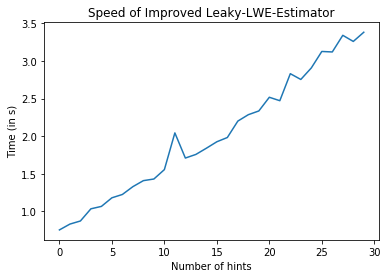

In [160]:
import matplotlib.pyplot as plt
plt.plot(nb_hints_list, timing)
plt.xlabel('Number of hints')
plt.ylabel('Time (in s)')
plt.title('Speed of Improved Leaky-LWE-Estimator')
plt.show()
None

In [226]:
nb_max_hints = 45
nb_experiments = 2
n = 30

In [227]:
timing1 = many_experiments(nb_experiments, n, nb_max_hints, DBDD, initialize_from_LWE_instance, estimate=False, estimate_at_the_beginning=False) 
timing2 = many_experiments(nb_experiments, n, nb_max_hints, DBDD, initialize_from_LWE_instance, estimate=True, estimate_at_the_beginning=True) 

In [228]:
timing3 = many_experiments(nb_experiments, n, nb_max_hints, original_framework.DBDD, original_framework.initialize_from_LWE_instance, estimate=False, estimate_at_the_beginning=False) 
timing4 = many_experiments(nb_experiments, n, nb_max_hints, original_framework.DBDD, original_framework.initialize_from_LWE_instance, estimate=True, estimate_at_the_beginning=True) 

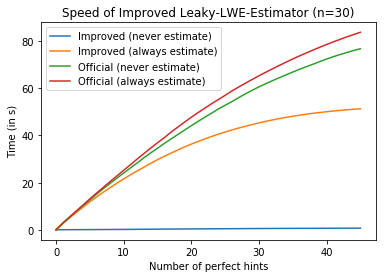

In [229]:
import matplotlib.pyplot as plt
plt.plot(timing1, label='Improved (never estimate)')
plt.plot(timing2, label='Improved (always estimate)')
plt.plot(timing3, label='Official (never estimate)')
plt.plot(timing4, label='Official (always estimate)')
plt.legend()
plt.xlabel('Number of perfect hints')
plt.ylabel('Time (in s)')
#plt.yscale('log')
plt.title(f'Speed of Improved Leaky-LWE-Estimator (n={n})')
plt.savefig('comparison-speed.png')
plt.show()
None

In [131]:
one_experiment(70, 2, DBDD, initialize_from_LWE_instance)

In [224]:
nb_max_hints = 7
nb_experiments = 10
n = 5
timing1 = many_experiments(nb_experiments, n, nb_max_hints, DBDD, initialize_from_LWE_instance, estimate=False, estimate_at_the_beginning=False) 
timing2 = many_experiments(nb_experiments, n, nb_max_hints, DBDD, initialize_from_LWE_instance, estimate=True, estimate_at_the_beginning=True) 
timing3 = many_experiments(nb_experiments, n, nb_max_hints, original_framework.DBDD, original_framework.initialize_from_LWE_instance, estimate=False, estimate_at_the_beginning=False) 
timing4 = many_experiments(nb_experiments, n, nb_max_hints, original_framework.DBDD, original_framework.initialize_from_LWE_instance, estimate=True, estimate_at_the_beginning=True)

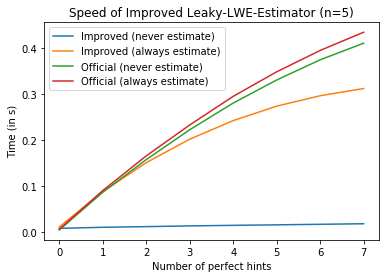

In [225]:
import matplotlib.pyplot as plt
plt.plot(timing1, label='Improved (never estimate)')
plt.plot(timing2, label='Improved (always estimate)')
plt.plot(timing3, label='Official (never estimate)')
plt.plot(timing4, label='Official (always estimate)')
plt.legend()
plt.xlabel('Number of perfect hints')
plt.ylabel('Time (in s)')
#plt.yscale('log')
plt.title(f'Speed of Improved Leaky-LWE-Estimator (n={n})')
plt.show()
None